# Stochastic Processes: inverse translation

This notebook focusses on the Inverse Translation Approximation Method (ITAM) - see **section 3.2.1** in the accompanying paper "UQpy: A general purpose Python package and development environment for uncertainty quantification". 

The inverse translation of a lognormal process i.e. identifying the underlying gaussian stochastic proccess is carried out. Firstly, the sample generation code and translation is presented, details of which can be found in 'Translation.ipynb'.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

T = 100  # Total time
nt = 256  # Num of Discretized Time
dt = T / nt

F = 1 / T * nt / 2  # Frequency.(Hz)
nw = 128  # Num of Discretized Freq.
dw = F / nw
t_u = 2*np.pi/2/F
if dt>t_u:
    print('Error (aliasing)')

# Generation of Input Data(Stationary)
t = np.linspace(0, T - dt, nt)
w = np.linspace(0, F - dw, nw)

# Compute the power spectral density S(w) at various points frequencies w
S = 130 / 4 * w ** 2 * np.exp(-5 * w)
nsamples = 1000

from UQpy.StochasticProcess import SRM
SRM_object = SRM(nsamples=nsamples, power_spectrum=S, time_duration=[dt], frequency_length=[dw],
                 number_time_intervals=[nt], number_frequency_intervals=[nw], case='uni',
                 random_state=1234)
samples = SRM_object.samples

from UQpy.Distributions import Lognormal

dist_object = Lognormal(0.5, 0, np.exp(0.5))

from UQpy.StochasticProcess import Translation

samples = samples.flatten()[:, np.newaxis]

Translate_object = Translation(dist_object=dist_object, time_duration=dt, frequency_interval=dw,
                               number_time_intervals=nt, number_frequency_intervals=nw, power_spectrum_gaussian=S)
# samples_ng = Translate_object.samples_non_gaussian
# samples_ng = samples_ng - np.mean(samples_ng)
R_ng = Translate_object.correlation_function_non_gaussian
S_ng = Translate_object.power_spectrum_non_gaussian
r_ng = Translate_object.scaled_correlation_function_non_gaussian

# samples_ng = samples_ng.reshape([1000, 1, 256])

Next, we identify the gaussian corelation function which upon translation yields the lognormal corelation

In [2]:
from UQpy.StochasticProcess import InverseTranslation

Inverse_translate_object = InverseTranslation(dist_object=dist_object, time_duration=dt, frequency_interval=dw,
                                              number_time_intervals=nt, number_frequency_intervals=nw,
                                              correlation_function_non_gaussian=R_ng)
R_g_inv = Inverse_translate_object.correlation_function_gaussian
S_g_inv = Inverse_translate_object.power_spectrum_gaussian

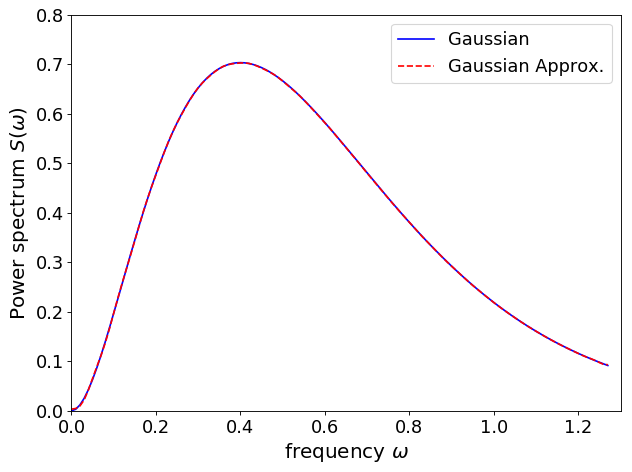

In [7]:
fig7 = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# fig7 = plt.figure()
# plt.plot(w, S_ng, label='non_Gaussian')
plt.plot(w, S, label='Gaussian', color='blue')
plt.plot(w, S_g_inv, label='Gaussian Approx.', color='red', linestyle='--')
plt.xlabel(r'frequency $\omega$', FontSize=18)
plt.ylabel(r'Power spectrum $S(\omega)$', FontSize=18)
plt.xlim(0, 1.3)
plt.ylim(0, 0.8)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper right', fontsize=16)
plt.tight_layout()
#plt.savefig('power_spectrum_inverse_translation_revision.pdf')
plt.show()